### Gender Bias By Vaishnavi

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind, ks_2samp, mannwhitneyu

In [19]:
# Loading dataset
df = pd.read_csv("/content/data.csv")
df.head()

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


# Data Cleaning and Preprocessing

In [6]:
# Checking for missing values
df.dropna(inplace=True)

df['Sex'] = df['Sex'].astype(int)
df['Diabetes_012'] = df['Diabetes_012'].astype(int)

# Statistical Tests

In [11]:
# 1. Chi-square test for categorical variables: It will help to identify if gender distribution impacts diabetes occurrence.
contingency_table = pd.crosstab(df['Sex'], df['Diabetes_012'])
chi2, p, _, _ = chi2_contingency(contingency_table)
print(f'Chi-square Test: χ²={chi2:.2f}, p-value={p:.4f}')

Chi-square Test: χ²=250.85, p-value=0.0000


In [12]:
# 2. T-test for numerical variables: BMI differs between genders, which could indicate gender-based bias.
t_stat, p_val = ttest_ind(df[df['Sex'] == 1]['BMI'], df[df['Sex'] == 0]['BMI'], equal_var=False)
print(f'T-test for BMI: t-stat={t_stat:.2f}, p-value={p_val:.4f}')

T-test for BMI: t-stat=22.11, p-value=0.0000


In [13]:
# 3. Kolmogorov-Smirnov (KS) Test for distribution differences: To evaluate if BMI distributions for males and females are different.
ks_stat, ks_p = ks_2samp(df[df['Sex'] == 1]['BMI'], df[df['Sex'] == 0]['BMI'])
print(f'Kolmogorov-Smirnov Test for BMI: KS-stat={ks_stat:.2f}, p-value={ks_p:.4f}')

Kolmogorov-Smirnov Test for BMI: KS-stat=0.13, p-value=0.0000


In [14]:
# 4. Mann-Whitney U Test for median differences: To identify if one gender has higher or lower BMI values without assuming normal distribution.
mw_stat, mw_p = mannwhitneyu(df[df['Sex'] == 1]['BMI'], df[df['Sex'] == 0]['BMI'])
print(f'Mann-Whitney U Test for BMI: U-stat={mw_stat:.2f}, p-value={mw_p:.4f}')


Mann-Whitney U Test for BMI: U-stat=8752180399.00, p-value=0.0000


In [15]:
# 5. Mean and Standard Deviation Comparison: To check the variability in BMI between genders is significant, checking for measurement bias.
bmi_mean_std = df.groupby('Sex')['BMI'].agg(['mean', 'std'])
print(f'BMI Mean and Standard Deviation by Gender:\n{bmi_mean_std}')


BMI Mean and Standard Deviation by Gender:
          mean       std
Sex                     
0    28.130587  7.088173
1    28.702362  5.928355


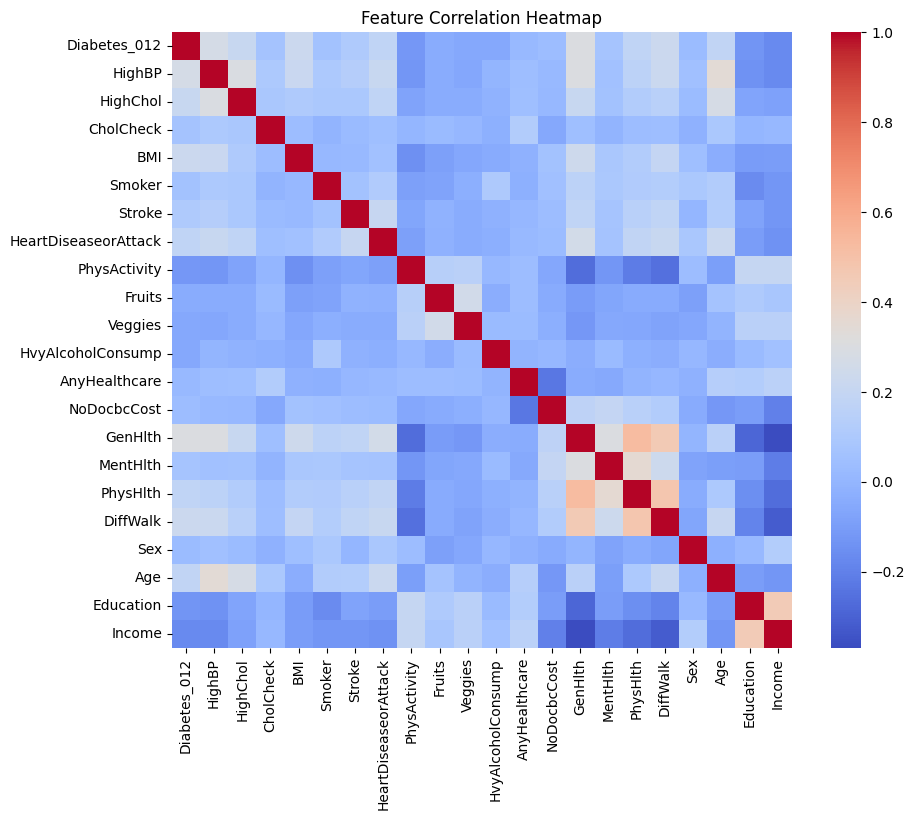

In [16]:
# Correlation Heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()

<ipython-input-7-e76937d6cc00>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Sex', data=df, palette='coolwarm')


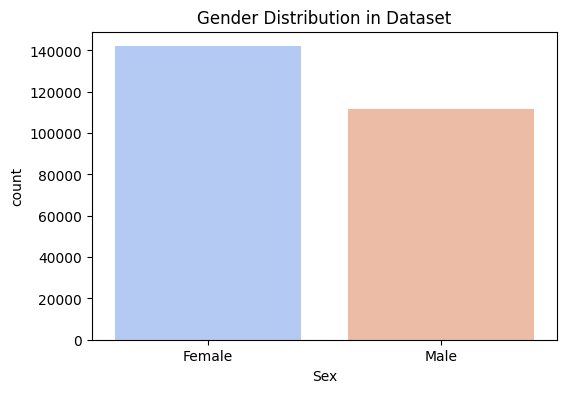

In [7]:
# Gender Distribution: To show the imbalance in gender representation.
plt.figure(figsize=(6,4))
sns.countplot(x='Sex', data=df, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('Gender Distribution in Dataset')
plt.show()

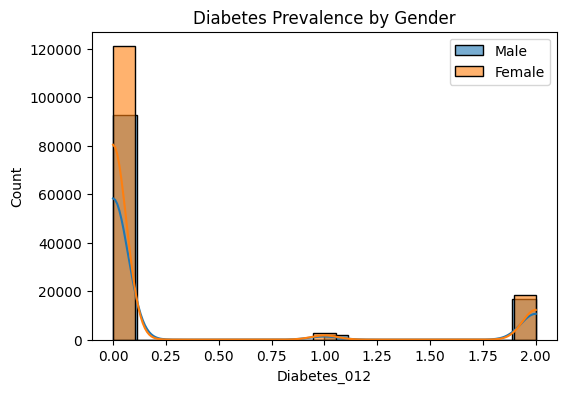

In [8]:
# Diabetes Prevalence by Gender
plt.figure(figsize=(6,4))
sns.histplot(df[df['Sex'] == 1]['Diabetes_012'], label='Male', alpha=0.6, kde=True)
sns.histplot(df[df['Sex'] == 0]['Diabetes_012'], label='Female', alpha=0.6, kde=True)
plt.legend()
plt.title('Diabetes Prevalence by Gender')
plt.show()

<ipython-input-21-76ac1019ed86>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Sex', y='BMI', data=df, palette='coolwarm')


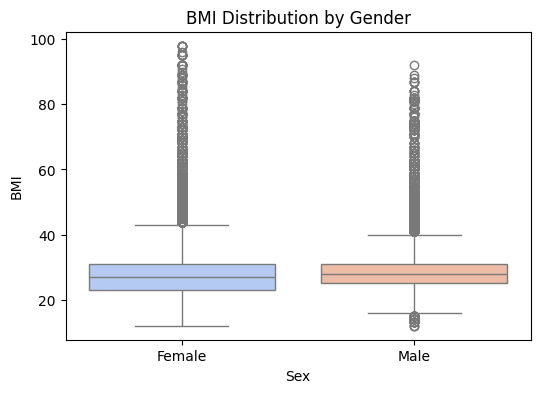

In [21]:
# Boxplot of BMI by Gender: To identifies BMI distribution differs by gender, indicating measurement bias.
plt.figure(figsize=(6,4))
sns.boxplot(x='Sex', y='BMI', data=df, palette='coolwarm')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.title('BMI Distribution by Gender')
plt.show()

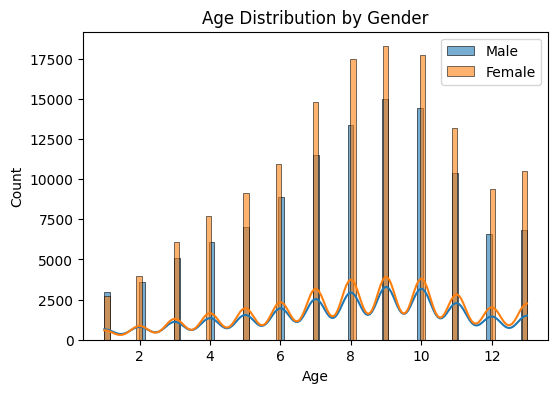

In [22]:
# Age Distribution by Gender
plt.figure(figsize=(6,4))
sns.histplot(df[df['Sex'] == 1]['Age'], label='Male', alpha=0.6, kde=True)
sns.histplot(df[df['Sex'] == 0]['Age'], label='Female', alpha=0.6, kde=True)
plt.legend()
plt.title('Age Distribution by Gender')
plt.show()

In [17]:
# To check if gender is imbalanced the model may be biased towards the majority gender, whcih leads to bad generalization.
gender_counts = df['Sex'].value_counts(normalize=True)
print(f'Gender Distribution: {gender_counts.to_dict()}')
if gender_counts.min() < 0.3:
    print("Warning: Significant gender imbalance detected. The model may be biased towards the dominant gender.")

Gender Distribution: {0: 0.5596578366445916, 1: 0.4403421633554084}


In [18]:
# Effect on Predictions
gender_diabetes_ratio = df.groupby('Sex')['Diabetes_012'].mean()
print(f'Average Diabetes Rate by Gender: {gender_diabetes_ratio.to_dict()}')
if abs(gender_diabetes_ratio[1] - gender_diabetes_ratio[0]) > 0.1:
    print("Bias Alert: Significant difference in diabetes prediction between genders. Consider balancing the dataset or using fairness-aware models.")


Average Diabetes Rate by Gender: {0: 0.2776987335709355, 1: 0.321352478828353}
